## Ising Hamiltonian with Long range System

In [52]:
from src.utils_sparse_diag import adj_generator,ising_coupling,ising_external_field,get_gs,functional_f,compute_magnetization
from typing import List,Tuple
import matplotlib.pyplot as plt
import quspin
from quspin.basis import spin_basis_1d
import numpy as np

#### First step: Define the Adjacency matrix and Create the Coupling Hamiltonian

Define the Callable. The callable is a function that returns the adjacency values for a given index

In [53]:
class LongRange():
    def __init__(self,alpha:int,j0:float) -> None:
        self.alpha=alpha
        self.j0=j0

    def long_range(self,i:int,l:int)->Tuple[List[int],List[float]]:
        jdx=[]
        values=[]
        for j in range(-int(l/2),int(l/2)):
            jdx.append((j+i)%l) #append the pbc index
            # the traslational invariance leads to a i-independent relation
            if j==0:
                values.append(0.5*self.j0/((np.abs(j-l))**self.alpha)+0.5*self.j0/((np.abs(j+l))**self.alpha)+0.5*self.j0/((np.abs(j+2*l))**self.alpha)+0.5*self.j0/((np.abs(j-2*l))**self.alpha))
            else:
                values.append(0.5*self.j0/((np.abs(j))**self.alpha)+0.5*self.j0/((np.abs(j-l))**self.alpha)+0.5*self.j0/((np.abs(j+l))**self.alpha)+0.5*self.j0/((np.abs(j+2*l))**self.alpha)+0.5*self.j0/((np.abs(j-2*l))**self.alpha))
        return jdx,values


l=16
alpha=4
j0=1.

Define the Adjacency given the callable. We now create the $J_{ad}$

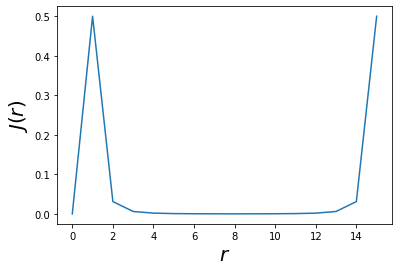

{(0, 8): 0.00024735001929012345, (0, 9): 0.00028773731623164405, (0, 10): 0.00043927082806067126, (0, 11): 0.0008379292422580864, (0, 12): 0.0019814738045517287, (0, 13): 0.006195222703310064, (0, 14): 0.03126876984504001, (0, 15): 0.5000168260810198, (0, 0): 1.621246337890625e-05, (0, 1): 0.5000168260810198, (0, 2): 0.03126876984504001, (0, 3): 0.006195222703310064, (0, 4): 0.0019814738045517287, (0, 5): 0.0008379292422580863, (0, 6): 0.00043927082806067126, (0, 7): 0.00028773731623164405, (1, 9): 0.00024735001929012345, (1, 10): 0.00028773731623164405, (1, 11): 0.00043927082806067126, (1, 12): 0.0008379292422580864, (1, 13): 0.0019814738045517287, (1, 14): 0.006195222703310064, (1, 15): 0.03126876984504001, (1, 0): 0.5000168260810198, (1, 1): 1.621246337890625e-05, (1, 2): 0.5000168260810198, (1, 3): 0.03126876984504001, (1, 4): 0.006195222703310064, (1, 5): 0.0019814738045517287, (1, 6): 0.0008379292422580863, (1, 7): 0.00043927082806067126, (1, 8): 0.00028773731623164405, (2, 10): 

In [54]:
longrange=LongRange(alpha=alpha,j0=j0)
adj=adj_generator(l=l,f=longrange.long_range)

#jdx,values=longrange.long_range(0,l=l)

#print(jdx,values)
#print(adj)
plt.plot([adj[(0,i)] for i in range(l)])
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$J(r)$',fontsize=20)
plt.show()

print(adj)


Create the universal term in the Hamiltonian

In [55]:
ham0,f=ising_coupling(adj=adj,l=l,basis=spin_basis_1d(l),direction='zz')

#### Define the external field Hamiltonian

Define the disorder external field

In [56]:
hmax=3
h=np.random.uniform(0,hmax,size=(l))
#data=np.load('data/dataset_long_range/unet_long_range_pbc_4.0_alpha_3_h_1.0_j_20_l_301_n lanczos.npz')
#h=data['potential'][8]

Define the external term

In [57]:
vx=ising_external_field(h=h,l=l,basis=spin_basis_1d(l),direction='x')

#### Get the Ground state and the expectation values

Define the total Hamiltonian

In [58]:
ham_tot=ham0+vx

Get the energy and the GS

In [59]:
e,psi=get_gs(ham=ham_tot,eightype='std',basis=spin_basis_1d(l),lanczos_dim=50)
print(e/l)

[-1.63103329]


Find the expectation values

In [60]:
f_ev=functional_f(psi=psi,l=l,f_density_op=f)
x=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='x')
z=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='z')
print(f_ev.shape)
f_ev=np.average(f_ev,axis=1) #this average makes the observable scalable

(16, 16)


Plot the results

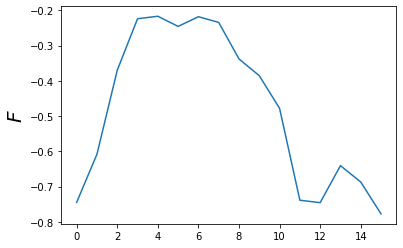

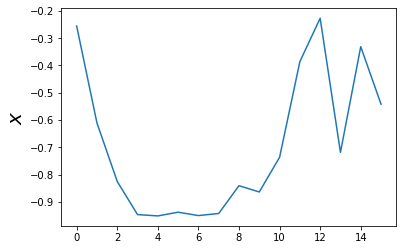

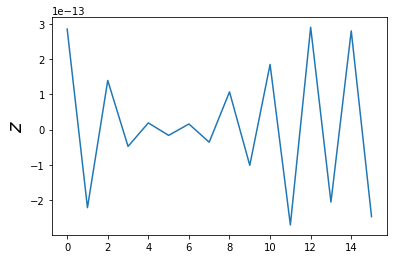

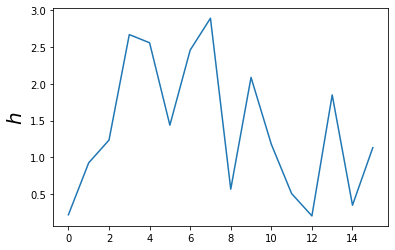

[-0.47846153]
-0.47846152631722005


In [61]:
plt.plot(16*f_ev)
plt.ylabel(r'$F$',fontsize=20)
plt.show()
plt.plot(x)
plt.ylabel(r'$x$',fontsize=20)
plt.show()
plt.plot(z)
plt.ylabel(r'$z$',fontsize=20)
plt.show()
plt.plot(h)
plt.ylabel(r'$h$',fontsize=20)
plt.show()

print(e/l-np.average(x*h))
print(np.average(f_ev)*l)